In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/iml_project/loan_approval_dataset (1).csv.crdownload")

In [ ]:
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [ ]:
# Remove leading spaces from column names
data.rename(columns=lambda x: x.strip(), inplace=True)

# Display the updated DataFrame
print(data.columns)

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


## **Data Preprocessing**

In [ ]:
data.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [ ]:
data.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(dtype = 'int32')
data.iloc[:,12:13] = oe.fit_transform(data.iloc[:,12:13])

<ipython-input-10-4995de1e4c01>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:,12:13] = oe.fit_transform(data.iloc[:,12:13])


In [ ]:
data.sample()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1605,1606,3,Not Graduate,Yes,8800000,26200000,20,865,19300000,9800000,27700000,12500000,0


In [ ]:
def gopal(x):
    if x == 1:
        return 0
    else:
        return 1
data['education'] = data['education'].apply(gopal)
data['loan_status'] = data['loan_status'].apply(gopal)
data['self_employed'] = data['self_employed'].apply(gopal)

In [ ]:
data.iloc[:,2:5]

,education,self_employed,income_annum
0,1,1,9600000
1,1,1,4100000
2,1,1,9100000
3,1,1,8200000
4,1,1,9800000
...,...,...,...
4264,1,1,1000000
4265,1,1,3300000
4266,1,1,6500000
4267,1,1,4100000


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(dtype = 'int32')
data.iloc[:,2:5] = oe.fit_transform(data.iloc[:,2:5])

In [ ]:
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,94,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,0,39,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,0,0,89,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,0,0,80,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,0,96,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,0,0,8,2300000,12,317,2800000,500000,3300000,800000,0
4265,4266,0,0,0,31,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,4267,2,0,0,63,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,4268,1,0,0,39,12800000,8,780,8200000,700000,14100000,5800000,1


In [ ]:
scaled_columns = data.iloc[:,4:12]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data.iloc[:,4:12] = scaler.fit_transform(data.iloc[:,4:12])

In [ ]:
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,1
1,2,0,0,0,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,0
2,3,3,0,0,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,0
3,4,3,0,0,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,0
4,5,5,0,0,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,0,0,0.082474,0.051020,0.555556,0.028333,0.099315,0.025773,0.077121,0.054422,0
4265,4266,0,0,0,0.319588,0.280612,1.000000,0.431667,0.147260,0.149485,0.275064,0.129252,1
4266,4267,2,0,0,0.649485,0.602041,0.888889,0.261667,0.044521,0.639175,0.457584,0.496599,0
4267,4268,1,0,0,0.402062,0.318878,0.333333,0.800000,0.284247,0.036082,0.354756,0.394558,1


In [ ]:
x = data.columns
relation_dict = {}
for i in x:
    relation =  data['loan_status'].corr(data[i])
    relation_dict[i]=relation

In [ ]:
relation_dict

{'loan_id': 0.01768504170018644,
 'no_of_dependents': -0.018114422862177695,
 'education': nan,
 'self_employed': nan,
 'income_annum': -0.01518915699194361,
 'loan_amount': 0.016149683925315923,
 'loan_term': -0.1130357849491543,
 'cibil_score': 0.7705183649807029,
 'residential_assets_value': -0.014366514535999325,
 'commercial_assets_value': 0.008245868278426232,
 'luxury_assets_value': -0.015464711194809497,
 'bank_asset_value': -0.0067784398003721035,
 'loan_status': 1.0}

In [ ]:
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,1
1,2,0,0,0,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,0
2,3,3,0,0,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,0
3,4,3,0,0,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,0
4,5,5,0,0,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,0,0,0.082474,0.051020,0.555556,0.028333,0.099315,0.025773,0.077121,0.054422,0
4265,4266,0,0,0,0.319588,0.280612,1.000000,0.431667,0.147260,0.149485,0.275064,0.129252,1
4266,4267,2,0,0,0.649485,0.602041,0.888889,0.261667,0.044521,0.639175,0.457584,0.496599,0
4267,4268,1,0,0,0.402062,0.318878,0.333333,0.800000,0.284247,0.036082,0.354756,0.394558,1


## **TRAIN TEST SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split
x = data.iloc[:,1:12]
y = data['loan_status']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

## **MODEL 1 (LOGISTIC REGRESSION)**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_lg = (accuracy_score(predictions,y_test))*100
accuracy_lg

91.56908665105387

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming x_train, y_train, x_test, and y_test are already defined

# Create a logistic regression model
lr = LogisticRegression()

# Perform k-fold cross-validation (let's say k=5)
k = 5
cross_val_scores = cross_val_score(lr, x_train, y_train, cv=k, scoring='accuracy')

# Train the model on the entire training set
lr.fit(x_train, y_train)

# Make predictions on the test set
predictions = lr.predict(x_test)

# Calculate accuracy on the test set
test_accuracy_lg = accuracy_score(predictions, y_test) * 100

# Calculate the average cross-validation accuracy and maximum accuracy
average_cv_accuracy_lg = np.mean(cross_val_scores) * 100
max_cv_accuracy_lg = np.max(cross_val_scores) * 100

# Print the results
print(f'Average Cross-Validation Accuracy: {average_cv_accuracy_lg:.2f}%')
print(f'Maximum Cross-Validation Accuracy: {max_cv_accuracy_lg:.2f}%')
print(f'Test Set Accuracy: {test_accuracy_lg:.2f}%')

Average Cross-Validation Accuracy: 91.48%
Maximum Cross-Validation Accuracy: 92.53%
Test Set Accuracy: 91.57%


## **MODEL-2 (KNN CLASSIFIER)**

Accuracy: 91.56908665105387


<Axes: >

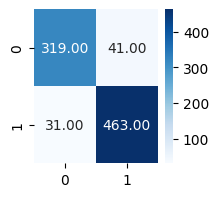

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN Classifier with a specific value of k (e.g., k=5)
knn_classifier1 = KNeighborsClassifier(n_neighbors=8)  # You can adjust the value of k

# Fit the classifier to your training data
knn_classifier1.fit(x_train, y_train)

# Make predictions on test data
y_pred = knn_classifier1.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(2,2))
sns.heatmap(cm1, annot=True, fmt=".2f", cmap = "Blues")


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming x_train, y_train, x_test, and y_test are already defined

# Define the range of k values
k_values = range(3, 16)

# Use StratifiedKFold for stratified bootstrapping
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Iterate over different values of k
for k in k_values:
    # Create a KNN Classifier with the current value of k
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Perform cross-validation with stratified bootstrapping
    cv_scores = cross_val_score(knn_classifier, x_train, y_train, cv=stratified_kfold, scoring='accuracy')

    # Calculate average accuracy
    avg_accuracy = np.mean(cv_scores) * 100

    # Print the results for the current k
    print(f'Average Stratified Bootstrapped Accuracy for k={k}: {avg_accuracy:.2f}%')

Average Stratified Bootstrapped Accuracy for k=3: 90.34%
Average Stratified Bootstrapped Accuracy for k=4: 90.22%
Average Stratified Bootstrapped Accuracy for k=5: 90.75%
Average Stratified Bootstrapped Accuracy for k=6: 91.10%
Average Stratified Bootstrapped Accuracy for k=7: 91.42%
Average Stratified Bootstrapped Accuracy for k=8: 91.65%
Average Stratified Bootstrapped Accuracy for k=9: 91.42%
Average Stratified Bootstrapped Accuracy for k=10: 92.15%
Average Stratified Bootstrapped Accuracy for k=11: 91.89%
Average Stratified Bootstrapped Accuracy for k=12: 92.15%
Average Stratified Bootstrapped Accuracy for k=13: 92.27%
Average Stratified Bootstrapped Accuracy for k=14: 92.42%
Average Stratified Bootstrapped Accuracy for k=15: 92.39%


## **MODEL-3 (SUPPORT VECTOR CLASSIFIER)**

Accuracy: 0.9262295081967213
Precision: 0.9315068493150684
Recall: 0.9444444444444444
F1 Score: 0.9379310344827586


<Axes: >

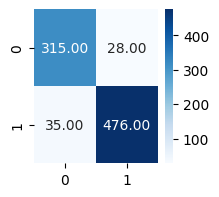

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score
#Creating an SVM classifier with a linear kernel:
svm_classifier = SVC(kernel="linear", C=1.0, random_state=42)

# Fit the classifier to the training data
svm_classifier.fit(x_train, y_train)
y_pred = svm_classifier.predict(x_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(2,2))
sns.heatmap(cm1, annot=True, fmt=".2f", cmap = "Blues")

## **MODEL-4(LINEAR DISCRIMINANT ANALYSIS)**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

# Fit the LDA model to your training data
lda.fit(x_train, y_train)

# Create a classifier (e.g., Logistic Regression) and train it on the transformed data
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)


Accuracy: 91.56908665105387


## **MODEL-5 (DECISION TREE CLASSIFIER)**

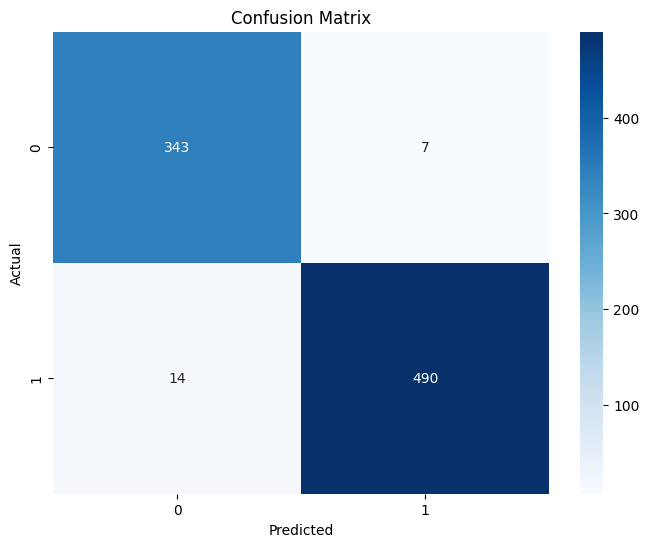

Decision Tree Classifier Metrics:
Accuracy: 0.9754098360655737
Precision: 0.9756158293379694
Recall: 0.9754098360655737
F1 Score: 0.9754455899562212
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       350
           1       0.99      0.97      0.98       504

    accuracy                           0.98       854
   macro avg       0.97      0.98      0.97       854
weighted avg       0.98      0.98      0.98       854



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DecisionTreeClassifier instance
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the decision tree model
decision_tree.fit(x_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Decision Tree Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

## **REGRESSION MODEL- 1 (LINEAR REGRESSION)**


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linear = LinearRegression()
linear.fit(x_train, y_train)
predictions = linear.predict(x_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(mse)
print(r2)

0.09392210107038013
0.6116842910190172


## **REGRESSION MODEL-2 (DECISION TREE REGRESSOR)**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regressor
regressor = DecisionTreeRegressor()

# Fit the regressor to your training data
regressor.fit(x_train, y_train)

# Make predictions on test data
y_pred = regressor.predict(x_test)

accuracy = (accuracy_score(y_pred,y_test))*100
accuracy


97.30679156908664

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np

# Create a Decision Tree Regressor
regressor = DecisionTreeRegressor()

# Fit the regressor to your training data
regressor.fit(x_train, y_train)

# Make predictions on test data
y_pred = regressor.predict(x_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print initial metrics
print(f'Initial Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Initial R-squared Score: {r2:.2f}')

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_regressor = grid_search.best_estimator_

# Make predictions on test data using the best regressor
y_pred_tuned = best_regressor.predict(x_test)
y_pred_tuned[y_pred_tuned > 0.5] = 1
y_pred_tuned[y_pred_tuned <= 0.5] = 0

# Calculate metrics for the tuned model
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
r2_tuned = r2_score(y_test, y_pred_tuned)

# Custom accuracy metric based on closeness threshold
threshold = 0.5
accuracy_tuned = np.mean(np.abs(y_pred_tuned - y_test) < threshold) * 100

# Print metrics for the tuned model
print('\nAfter Hyperparameter Tuning:')
print(f'Root Mean Squared Error (RMSE): {rmse_tuned:.2f}')
print(f'R-squared Score: {r2_tuned:.2f}')
print(f'Custom Accuracy (within {threshold} units): {accuracy_tuned:.2f}%')



Initial Root Mean Squared Error (RMSE): 0.15
Initial R-squared Score: 0.90

After Hyperparameter Tuning:
Root Mean Squared Error (RMSE): 0.16
R-squared Score: 0.89
Custom Accuracy (within 0.5 units): 97.31%


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Create a Decision Tree Regressor
regressor = DecisionTreeRegressor()

# Perform cross-validation with 10 folds
cross_val_scores = cross_val_score(regressor, x_train, y_train, cv=10, scoring='accuracy')

# Calculate average and maximum accuracy
avg_accuracy = np.mean(cross_val_scores) * 100
max_accuracy = np.max(cross_val_scores) * 100

# Print the results
print(f'Average Cross-Validation Accuracy: {avg_accuracy:.2f}%')
print(f'Maximum Cross-Validation Accuracy: {max_accuracy:.2f}%')

Average Cross-Validation Accuracy: 97.72%
Maximum Cross-Validation Accuracy: 99.12%


## **ENSEMBLE MODEL-1 (RANDOM FOREST CLASSIFIER)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
# Fit the classifier to your training data
rf_classifier.fit(x_train, y_train)

# Make predictions on test data
y_pred = rf_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)


Accuracy: 97.89227166276346


## **ENSEMBLE MODEL-2 (XGBOOST CLASSIFIER)**

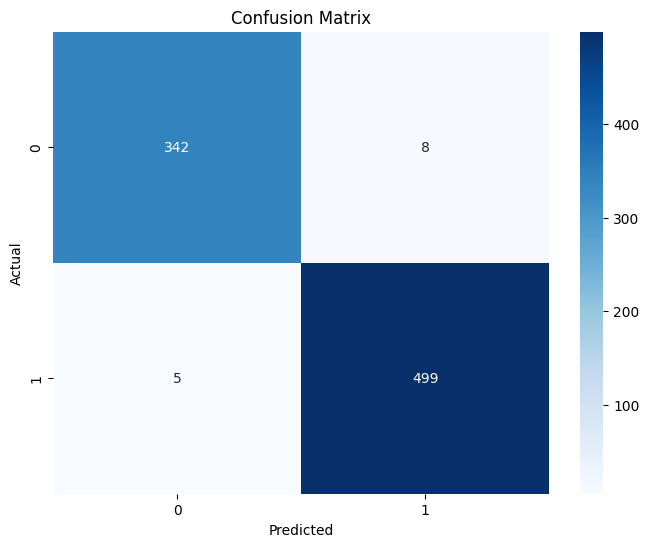

XGBoost Classifier Metrics:
Accuracy: 0.9847775175644028
Precision: 0.9847823297569093
Recall: 0.9847775175644028
F1 Score: 0.9847673428446738
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       350
           1       0.98      0.99      0.99       504

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create an XGBClassifier instance
xgb_classifier = XGBClassifier(random_state=42)

# Train the XGBoost model
xgb_classifier.fit(x_train, y_train)

# Predict on the test set
y_pred = xgb_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("XGBoost Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

## **Customer Details**

In [ ]:
detail_list = list()
no_of_dependents = int(input("no_of_dependents:"))
no_of_dependents = (no_of_dependents-min(data['no_of_dependents']))/(max(data['no_of_dependents'])-min(data['no_of_dependents']))
detail_list.append(no_of_dependents)

education = input("education:")
if education == 'Graduate':
  education = 1
else:
  education = 0
detail_list.append(education)

self_employed = input("self_employed:")
if self_employed == 'Yes':
  self_employed = 1
else:
  self_employed = 0
detail_list.append(self_employed)

income_annum = int(input("income_annum:"))
income_annum = (income_annum-min(data['income_annum']))/(max(data['income_annum'])-min(data['income_annum']))
detail_list.append(income_annum)

loan_amount = int(input("loan_amount:"))
loan_amount = (loan_amount-min(data['loan_amount']))/(max(data['loan_amount'])-min(data['loan_amount']))
detail_list.append(loan_amount)

loan_term = int(input("loan_term:"))
loan_term = (loan_term-min(data['loan_term']))/(max(data['loan_term'])-min(data['loan_term']))
detail_list.append(loan_term)


cibil_score = int(input("cibil_score:"))
cibil_score = (cibil_score-min(data['cibil_score']))/(max(data['cibil_score'])-min(data['cibil_score']))
detail_list.append(cibil_score)

residential_assets_value = int(input("residential_assets_value:"))
residential_assets_value = (residential_assets_value-min(data['residential_assets_value']))/(max(data['residential_assets_value'])-min(data['residential_assets_value']))
detail_list.append(residential_assets_value)

commercial_assets_value = int(input("commercial_assets_value:"))
commercial_assets_value = (commercial_assets_value-min(data['commercial_assets_value']))/(max(data['commercial_assets_value'])-min(data['commercial_assets_value']))
detail_list.append(commercial_assets_value)

luxury_assets_value = int(input("luxury_assets_value:"))
luxury_assets_value = (luxury_assets_value-min(data['luxury_assets_value']))/(max(data['luxury_assets_value'])-min(data['luxury_assets_value']))
detail_list.append(luxury_assets_value)

bank_asset_value = int(input("bank_asset_value:"))
bank_asset_value = (bank_asset_value-min(data['bank_asset_value']))/(max(data['bank_asset_value'])-min(data['bank_asset_value']))
detail_list.append(bank_asset_value)

information = np.array(detail_list)
type(information)
information1 = information.reshape(1,11)
print(x_test.shape)
print(information1.shape)
print(information1)


no_of_dependents:2
education:Graduate	
self_employed:No
income_annum:9600000
loan_amount:29900000
loan_term:12
cibil_score:8
residential_assets_value:2400000
commercial_assets_value:17600000
luxury_assets_value:22700000
bank_asset_value:8000000
(854, 11)
(1, 11)
[[4.00e-01 0.00e+00 0.00e+00 9.60e+06 2.99e+07 1.20e+01 8.00e+00 2.40e+06
  1.76e+07 2.27e+07 8.00e+06]]


## **Final Result**

In [ ]:
predict = lr.predict(information1)
if predict == 1:
  print("Approved")
else:
  print("Not Approved")

Approved


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
predict = knn_classifier1.predict(information1)
if predict == 1:
  print("Approved")
else:
  print("Not Approved")

Approved


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
predict = svm_classifier.predict(information1)
if predict == 1:
  print("Approved")
else:
  print("Not Approved")

Approved


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
predict = decision_tree.predict(information1)
if predict == 1:
  print("Approved")
else:
  print("Not Approved")

Approved


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
predict = linear.predict(information1)
if predict == 1:
  print("Approved")
else:
  print("Not Approved")

Not Approved


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
